In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import cufflinks as cf
from plotly.offline import download_plotlyjs, plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
df = pd.read_csv('DATA/cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [11]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

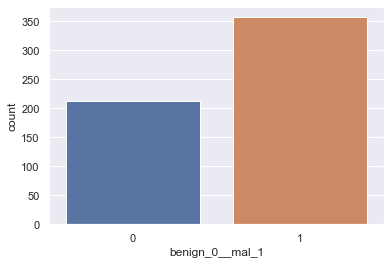

In [15]:
sns.countplot(x='benign_0__mal_1', data=df)

In [23]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

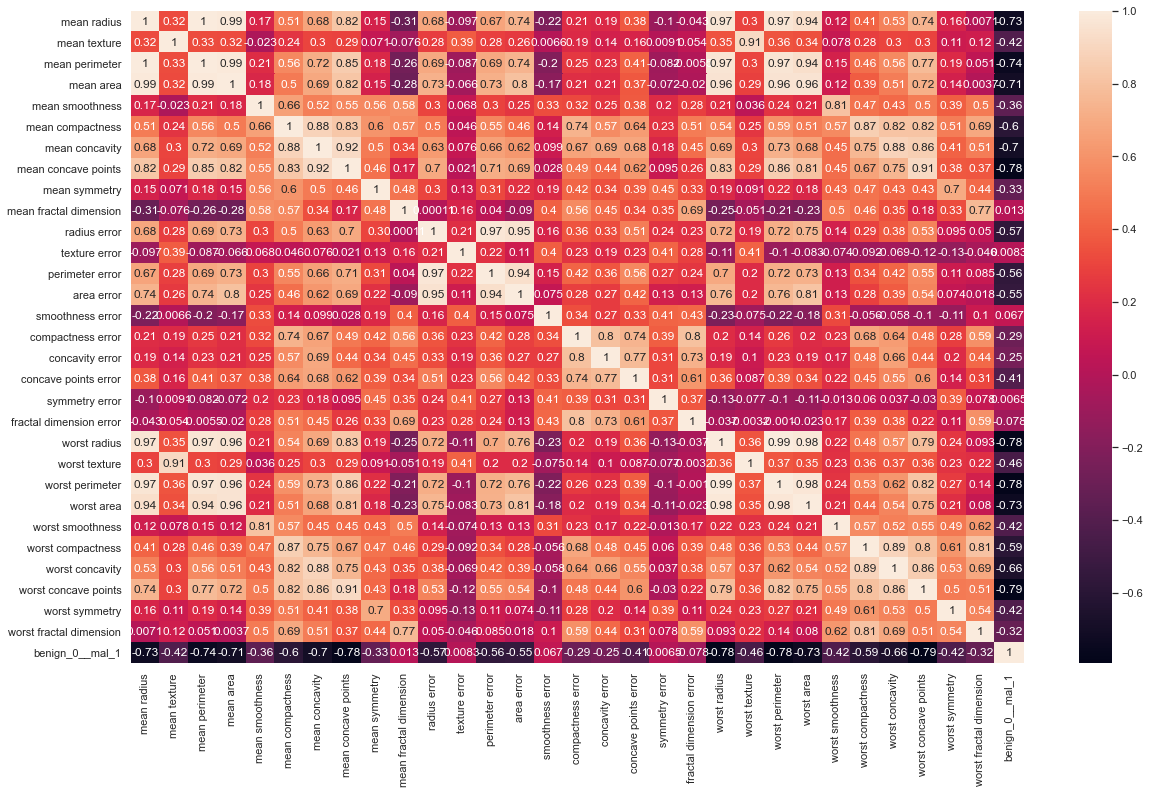

In [22]:
plt.figure(figsize=(20,12))
sns.heatmap(data=df.corr(), annot=True)

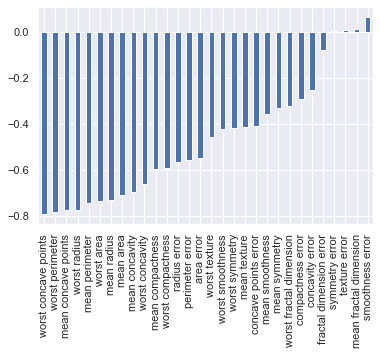

In [26]:
df.corr()['benign_0__mal_1'].sort_values().drop('benign_0__mal_1').plot(kind='bar')

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = df.drop('benign_0__mal_1', axis=1).values
y=df['benign_0__mal_1'].values

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [35]:
X_train = scaler.fit_transform(X_train)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [39]:
X_train.shape

(426, 30)

In [41]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [43]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=600)

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6765 - val_loss: 0.6542
Epoch 2/600
426/426 [==============================] - 0s 80us/sample - loss: 0.6369 - val_loss: 0.6159
Epoch 3/600
426/426 [==============================] - 0s 84us/sample - loss: 0.5949 - val_loss: 0.5703
Epoch 4/600
426/426 [==============================] - 0s 85us/sample - loss: 0.5460 - val_loss: 0.5199
Epoch 5/600
426/426 [==============================] - 0s 81us/sample - loss: 0.4944 - val_loss: 0.4679
Epoch 6/600
426/426 [==============================] - 0s 81us/sample - loss: 0.4456 - val_loss: 0.4175
Epoch 7/600
426/426 [==============================] - 0s 82us/sample - loss: 0.3957 - val_loss: 0.3699
Epoch 8/600
426/426 [==============================] - 0s 74us/sample - loss: 0.3522 - val_loss: 0.3294
Epoch 9/600
426/426 [==============================] - 0s 73us/sample - loss: 0.3187 - val_loss: 0.2969
Epoch 10/600
426/42

426/426 [==============================] - 0s 73us/sample - loss: 0.0523 - val_loss: 0.1085
Epoch 79/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0494 - val_loss: 0.1145
Epoch 80/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0494 - val_loss: 0.1091
Epoch 81/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0495 - val_loss: 0.1112
Epoch 82/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0486 - val_loss: 0.1026
Epoch 83/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0512 - val_loss: 0.1145
Epoch 84/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0523 - val_loss: 0.1108
Epoch 85/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0483 - val_loss: 0.1118
Epoch 86/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0483 - val_loss: 0.1025
Epoch 87/600
426/426 [==============================] - 0s 63us/samp

426/426 [==============================] - 0s 73us/sample - loss: 0.0362 - val_loss: 0.1198
Epoch 156/600
426/426 [==============================] - 0s 72us/sample - loss: 0.0351 - val_loss: 0.1143
Epoch 157/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0351 - val_loss: 0.1280
Epoch 158/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0355 - val_loss: 0.1217
Epoch 159/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0345 - val_loss: 0.1124
Epoch 160/600
426/426 [==============================] - 0s 65us/sample - loss: 0.0345 - val_loss: 0.1230
Epoch 161/600
426/426 [==============================] - 0s 74us/sample - loss: 0.0352 - val_loss: 0.1171
Epoch 162/600
426/426 [==============================] - 0s 76us/sample - loss: 0.0343 - val_loss: 0.1198
Epoch 163/600
426/426 [==============================] - 0s 76us/sample - loss: 0.0373 - val_loss: 0.1253
Epoch 164/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 82us/sample - loss: 0.0244 - val_loss: 0.1241
Epoch 233/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0263 - val_loss: 0.1283
Epoch 234/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0275 - val_loss: 0.1181
Epoch 235/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0245 - val_loss: 0.1274
Epoch 236/600
426/426 [==============================] - 0s 72us/sample - loss: 0.0259 - val_loss: 0.1246
Epoch 237/600
426/426 [==============================] - 0s 74us/sample - loss: 0.0341 - val_loss: 0.1492
Epoch 238/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0282 - val_loss: 0.1191
Epoch 239/600
426/426 [==============================] - 0s 71us/sample - loss: 0.0245 - val_loss: 0.1211
Epoch 240/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0262 - val_loss: 0.1266
Epoch 241/600
426/426 [==============================] - 0s 

Epoch 309/600
426/426 [==============================] - 0s 74us/sample - loss: 0.0184 - val_loss: 0.1505
Epoch 310/600
426/426 [==============================] - 0s 72us/sample - loss: 0.0184 - val_loss: 0.1324
Epoch 311/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0170 - val_loss: 0.1419
Epoch 312/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0161 - val_loss: 0.1407
Epoch 313/600
426/426 [==============================] - 0s 74us/sample - loss: 0.0161 - val_loss: 0.1380
Epoch 314/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0163 - val_loss: 0.1446
Epoch 315/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0165 - val_loss: 0.1483
Epoch 316/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0155 - val_loss: 0.1391
Epoch 317/600
426/426 [==============================] - 0s 72us/sample - loss: 0.0156 - val_loss: 0.1420
Epoch 318/600
426/426 [=======================

Epoch 386/600
426/426 [==============================] - 0s 72us/sample - loss: 0.0109 - val_loss: 0.1602
Epoch 387/600
426/426 [==============================] - ETA: 0s - loss: 2.9930e-0 - 0s 75us/sample - loss: 0.0106 - val_loss: 0.1630
Epoch 388/600
426/426 [==============================] - 0s 86us/sample - loss: 0.0124 - val_loss: 0.1538
Epoch 389/600
426/426 [==============================] - 0s 78us/sample - loss: 0.0137 - val_loss: 0.1853
Epoch 390/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0152 - val_loss: 0.1576
Epoch 391/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0116 - val_loss: 0.1556
Epoch 392/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0096 - val_loss: 0.1586
Epoch 393/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0100 - val_loss: 0.1614
Epoch 394/600
426/426 [==============================] - 0s 72us/sample - loss: 0.0100 - val_loss: 0.1635
Epoch 395/600
426/

Epoch 463/600
426/426 [==============================] - 0s 84us/sample - loss: 0.0056 - val_loss: 0.1769
Epoch 464/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0057 - val_loss: 0.1718
Epoch 465/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0062 - val_loss: 0.1756
Epoch 466/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0064 - val_loss: 0.1692
Epoch 467/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0076 - val_loss: 0.1851
Epoch 468/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0059 - val_loss: 0.1621
Epoch 469/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0078 - val_loss: 0.1900
Epoch 470/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0055 - val_loss: 0.1733
Epoch 471/600
426/426 [==============================] - 0s 72us/sample - loss: 0.0059 - val_loss: 0.1740
Epoch 472/600
426/426 [=======================

426/426 [==============================] - 0s 70us/sample - loss: 0.0047 - val_loss: 0.1769
Epoch 541/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0035 - val_loss: 0.1937
Epoch 542/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0033 - val_loss: 0.1828
Epoch 543/600
426/426 [==============================] - 0s 71us/sample - loss: 0.0029 - val_loss: 0.1859
Epoch 544/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0028 - val_loss: 0.1900
Epoch 545/600
426/426 [==============================] - 0s 71us/sample - loss: 0.0030 - val_loss: 0.1896
Epoch 546/600
426/426 [==============================] - 0s 72us/sample - loss: 0.0027 - val_loss: 0.1892
Epoch 547/600
426/426 [==============================] - 0s 74us/sample - loss: 0.0028 - val_loss: 0.1861
Epoch 548/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0027 - val_loss: 0.1858
Epoch 549/600
426/426 [==============================] - 0s 

In [44]:
loss = pd.DataFrame(model.history.history)

In [55]:
loss.iplot()

In [56]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [58]:
from tensorflow.keras.callbacks import EarlyStopping

In [60]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [61]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=600, callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 1ms/sample - loss: 0.7046 - val_loss: 0.6825
Epoch 2/600
426/426 [==============================] - 0s 77us/sample - loss: 0.6678 - val_loss: 0.6520
Epoch 3/600
426/426 [==============================] - 0s 80us/sample - loss: 0.6365 - val_loss: 0.6213
Epoch 4/600
426/426 [==============================] - 0s 102us/sample - loss: 0.6029 - val_loss: 0.5868
Epoch 5/600
426/426 [==============================] - 0s 81us/sample - loss: 0.5661 - val_loss: 0.5448
Epoch 6/600
426/426 [==============================] - 0s 72us/sample - loss: 0.5254 - val_loss: 0.4998
Epoch 7/600
426/426 [==============================] - 0s 73us/sample - loss: 0.4806 - val_loss: 0.4561
Epoch 8/600
426/426 [==============================] - 0s 73us/sample - loss: 0.4352 - val_loss: 0.4014
Epoch 9/600
426/426 [==============================] - 0s 73us/sample - loss: 0.3886 - val_loss: 0.3563
Epoch 10/600
426/4

Epoch 78/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0551 - val_loss: 0.1103
Epoch 79/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0587 - val_loss: 0.1157
Epoch 00079: early stopping


In [62]:
model_loss = pd.DataFrame(model.history.history)
model_loss.iplot()

In [63]:
from tensorflow.keras.layers import Dropout

In [64]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(15, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [65]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=600, callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.7601 - val_loss: 0.6955
Epoch 2/600
426/426 [==============================] - 0s 82us/sample - loss: 0.6958 - val_loss: 0.6697
Epoch 3/600
426/426 [==============================] - 0s 81us/sample - loss: 0.6602 - val_loss: 0.6481
Epoch 4/600
426/426 [==============================] - 0s 81us/sample - loss: 0.6481 - val_loss: 0.6152
Epoch 5/600
426/426 [==============================] - 0s 81us/sample - loss: 0.6274 - val_loss: 0.5839
Epoch 6/600
426/426 [==============================] - 0s 78us/sample - loss: 0.6173 - val_loss: 0.5470
Epoch 7/600
426/426 [==============================] - 0s 77us/sample - loss: 0.5719 - val_loss: 0.5123
Epoch 8/600
426/426 [==============================] - 0s 80us/sample - loss: 0.5340 - val_loss: 0.4775
Epoch 9/600
426/426 [==============================] - ETA: 0s - loss: 0.574 - 0s 84us/sample - loss: 0.5275 - val_loss: 0.

Epoch 78/600
426/426 [==============================] - 0s 70us/sample - loss: 0.1121 - val_loss: 0.1046
Epoch 79/600
426/426 [==============================] - 0s 73us/sample - loss: 0.1234 - val_loss: 0.0944
Epoch 80/600
426/426 [==============================] - 0s 68us/sample - loss: 0.1158 - val_loss: 0.1036
Epoch 81/600
426/426 [==============================] - 0s 70us/sample - loss: 0.1179 - val_loss: 0.1106
Epoch 82/600
426/426 [==============================] - 0s 71us/sample - loss: 0.1055 - val_loss: 0.1033
Epoch 83/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0944 - val_loss: 0.1151
Epoch 84/600
426/426 [==============================] - 0s 80us/sample - loss: 0.1227 - val_loss: 0.0967
Epoch 85/600
426/426 [==============================] - 0s 73us/sample - loss: 0.1118 - val_loss: 0.0996
Epoch 86/600
426/426 [==============================] - 0s 75us/sample - loss: 0.1018 - val_loss: 0.1055
Epoch 87/600
426/426 [==============================] -

In [67]:
model_loss = pd.DataFrame(model.history.history)
model_loss.iplot()

In [68]:
pred = model.predict_classes(X_test)

In [69]:
from sklearn.metrics import classification_report, confusion_matrix

In [70]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.99      0.99      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [71]:
print(confusion_matrix(y_test, pred))

[[54  1]
 [ 1 87]]
